<a href="https://colab.research.google.com/github/usshaa/SkillzRevozCV2/blob/main/CNN/Notebook/08_Unified_CNN_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unified Computer Vision Notebook: Classification, Detection, Segmentation

This notebook demonstrates three key computer vision use cases using CNNs:
1. **Image Classification**
2. **Object Detection**
3. **Image Segmentation**

We'll use CIFAR-10 for classification demo, and COCO128 (via Ultralytics YOLOv8) for detection and segmentation.

In [1]:
!pip install -q ultralytics tensorflow matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from ultralytics import YOLO
print('TF version:', tf.__version__)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
TF version: 2.19.0


## Part 1: Image Classification (CIFAR-10 subset)
We train a simple CNN to classify airplanes vs cars.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Filter two classes: airplane(0) vs automobile(1)
sel_train = np.isin(y_train.flatten(), [0,1])
x_train, y_train = x_train[sel_train], y_train[sel_train]
y_train = (y_train.flatten() == 1).astype(int)

sel_test = np.isin(y_test.flatten(), [0,1])
x_test, y_test = x_test[sel_test], y_test[sel_test]
y_test = (y_test.flatten() == 1).astype(int)

x_train, x_test = x_train/255.0, x_test/255.0

clf_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
clf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
clf_model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=64)
loss, acc = clf_model.evaluate(x_test, y_test)
print('Test accuracy:', acc)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.7051 - loss: 0.5403 - val_accuracy: 0.8670 - val_loss: 0.3059
Epoch 2/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.8717 - loss: 0.3058 - val_accuracy: 0.9020 - val_loss: 0.2463
Epoch 3/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.8993 - loss: 0.2359 - val_accuracy: 0.9115 - val_loss: 0.2154
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9171 - loss: 0.1849
Test accuracy: 0.9204999804496765


## Part 2: Object Detection (YOLOv8)
We use YOLOv8 pretrained on COCO to detect objects in images.


image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 302.3ms
Speed: 15.1ms preprocess, 302.3ms inference, 28.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict


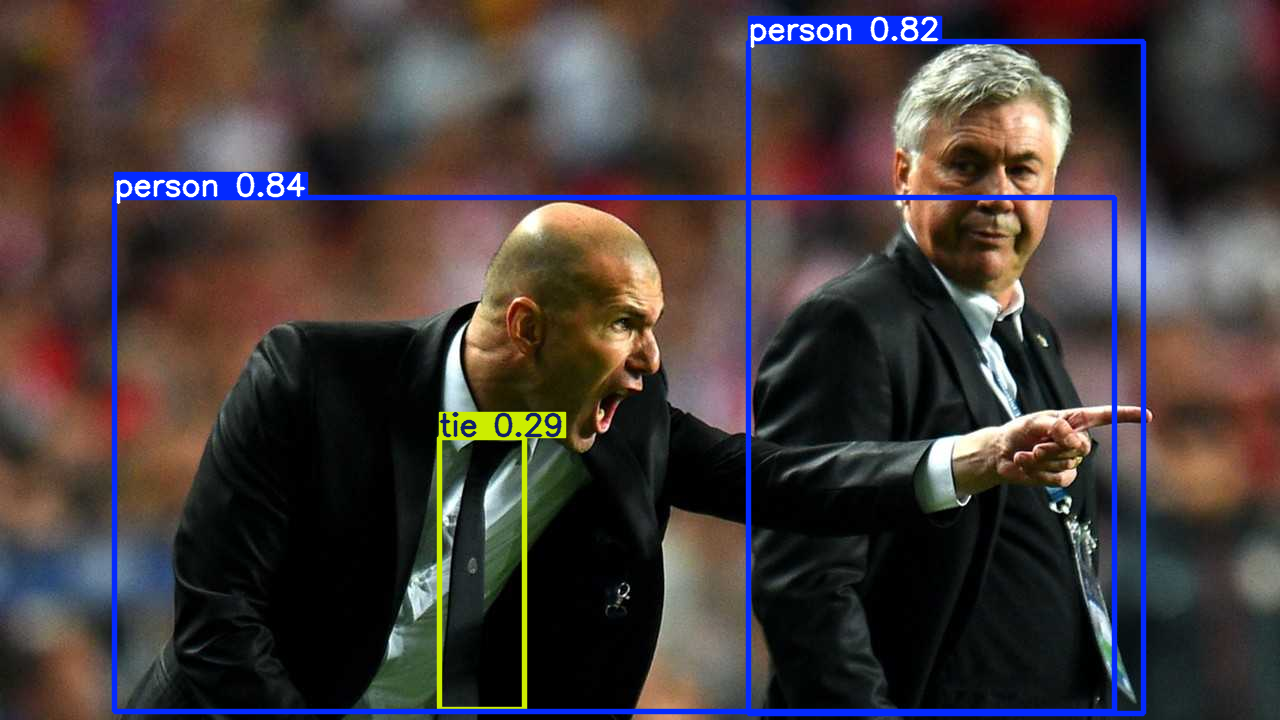

In [4]:
det_model = YOLO('yolov8n.pt')
results = det_model.predict(source='https://ultralytics.com/images/zidane.jpg', save=True)
results[0].show()

## Part 3: Image Segmentation (YOLOv8-seg)
We use YOLOv8 segmentation model to get pixel-level masks of detected objects.


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 296.8ms
Speed: 8.8ms preprocess, 296.8ms inference, 18.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/segment/predict


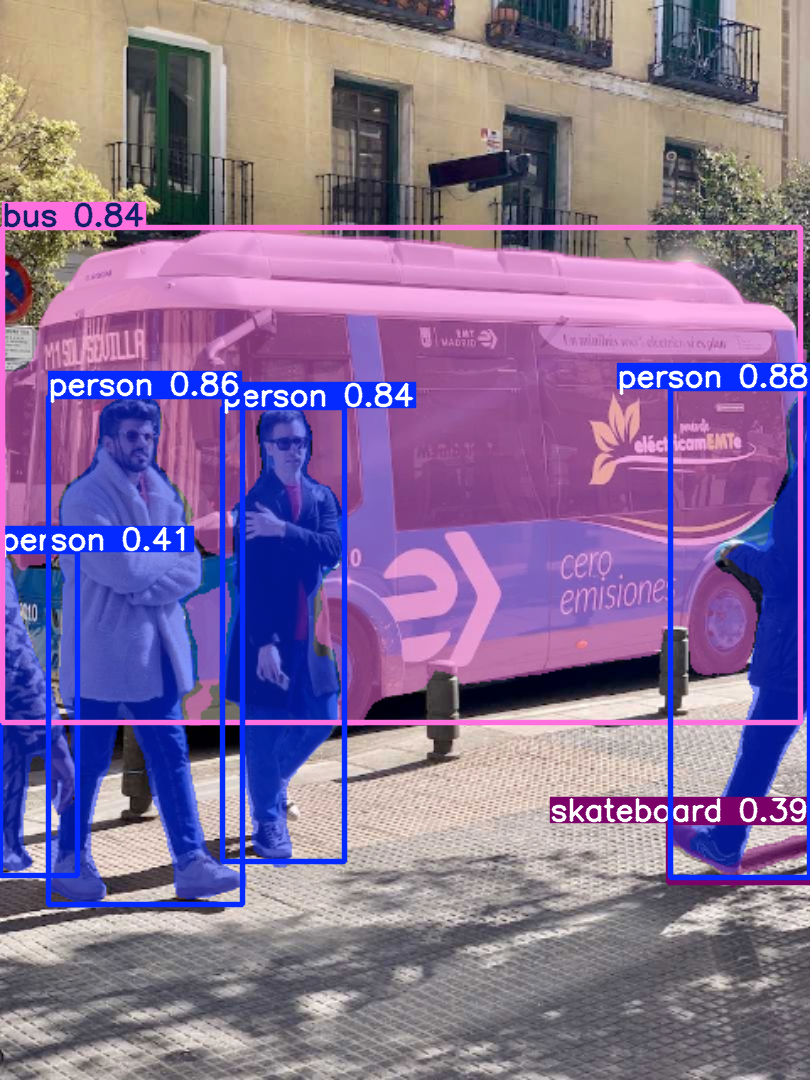

In [5]:
seg_model = YOLO('yolov8n-seg.pt')
seg_results = seg_model.predict(source='https://ultralytics.com/images/bus.jpg', save=True)
seg_results[0].show()